In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("michealknight/personal-ecommerce-website-ad-cost-and-viewer-count")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/michealknight/personal-ecommerce-website-ad-cost-and-viewer-count/versions/1


In [ ]:
!ls '/root/.cache/kagglehub/datasets/michealknight/personal-ecommerce-website-ad-cost-and-viewer-count/versions/1/'

final_website_stats.csv


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/michealknight/personal-ecommerce-website-ad-cost-and-viewer-count/versions/1/final_website_stats.csv')
df['page_views'] = df['page_views'].astype(int)
display(df.head())

,Unnamed: 0,timestamp,page_views,ad_spend,is_weekend,day_of_week,is_holiday
0,0,2022-01-01,1165,194.901425,True,Saturday,True
1,1,2022-01-02,1191,175.852071,True,Sunday,False
2,2,2022-01-03,1266,269.430656,False,Monday,False
3,3,2022-01-04,1364,295.690896,False,Tuesday,False
4,4,2022-01-05,1013,242.975399,False,Wednesday,False


In [ ]:
display(df.shape)
display(df.info())

(1096, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1096 non-null   int64  
 1   timestamp    1096 non-null   object 
 2   page_views   1096 non-null   int64  
 3   ad_spend     1096 non-null   float64
 4   is_weekend   1096 non-null   bool   
 5   day_of_week  1096 non-null   object 
 6   is_holiday   1096 non-null   bool   
dtypes: bool(2), float64(1), int64(2), object(2)
memory usage: 45.1+ KB


None

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
display(df.head())

,Unnamed: 0,page_views,ad_spend,is_weekend,day_of_week,is_holiday
timestamp,,,,,,
2022-01-01,0,1165,194.901425,True,Saturday,True
2022-01-02,1,1191,175.852071,True,Sunday,False
2022-01-03,2,1266,269.430656,False,Monday,False
2022-01-04,3,1364,295.690896,False,Tuesday,False
2022-01-05,4,1013,242.975399,False,Wednesday,False


In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day_of_week_num'] = df.index.dayofweek # Monday=0, Sunday=6
display(df.head())

,Unnamed: 0,page_views,ad_spend,is_weekend,day_of_week,is_holiday,year,month,day_of_week_num
timestamp,,,,,,,,,
2022-01-01,0,1165,194.901425,True,Saturday,True,2022,1,5
2022-01-02,1,1191,175.852071,True,Sunday,False,2022,1,6
2022-01-03,2,1266,269.430656,False,Monday,False,2022,1,0
2022-01-04,3,1364,295.690896,False,Tuesday,False,2022,1,1
2022-01-05,4,1013,242.975399,False,Wednesday,False,2022,1,2


,page_views,ad_spend
count,1096.000000,1096.000000
mean,1552.696168,249.518466
std,277.137270,73.055129
min,867.000000,113.665941
25%,1350.000000,206.832469
50%,1561.500000,240.465752
75%,1746.250000,269.795000
max,2286.000000,679.515529


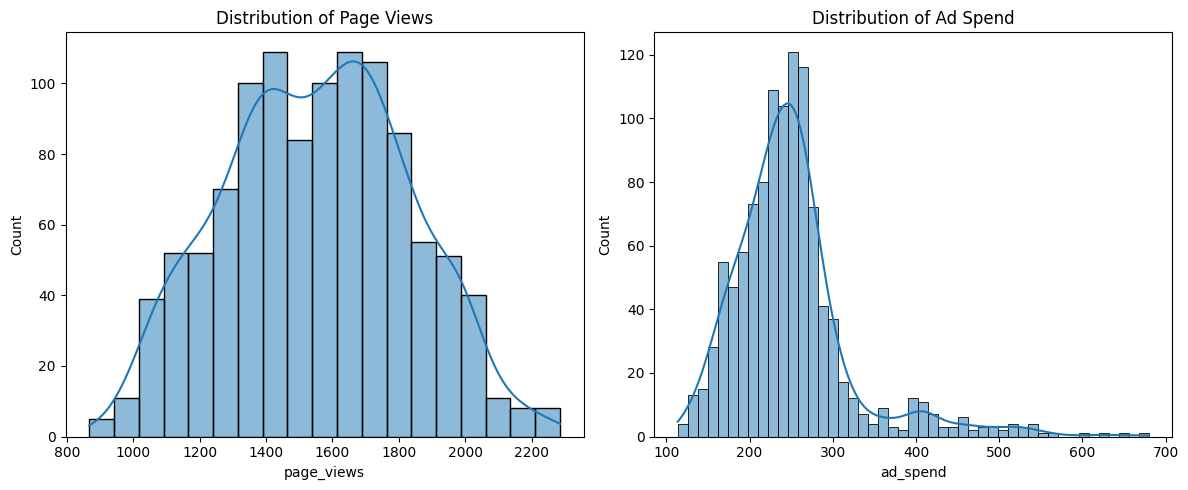

In [ ]:
display(df[['page_views', 'ad_spend']].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['page_views'], kde=True)
plt.title('Distribution of Page Views')

plt.subplot(1, 2, 2)
sns.histplot(df['ad_spend'], kde=True)
plt.title('Distribution of Ad Spend')

plt.tight_layout()
plt.show()

Ever wondered how ad spend really impacts website traffic, especially around weekends and holidays? 🤔 Just wrapped up an exciting data analysis project on a personal e-commerce site, diving deep into page views, ad costs, and those crucial calendar events.

Key takeaways that might surprise you:
📈 Ad spend *does* drive traffic, but it's not a simple linear equation. There's more to the story!
☀️ Weekends bring more organic views with *less* ad spend – great news for cost-effective reach!
🎉 Holidays see a *huge* spike in both ad spend and page views. Are you capitalizing on these peaks effectively?

Understanding these dynamics is crucial for optimizing marketing budgets and maximizing your online presence.

Check out the full analysis [Link to your project/notebook if you plan to share it]

#DataAnalysis #Ecommerce #Marketing #AdSpend #WebsiteTraffic #BusinessIntelligence #DataScience #LinkedIn

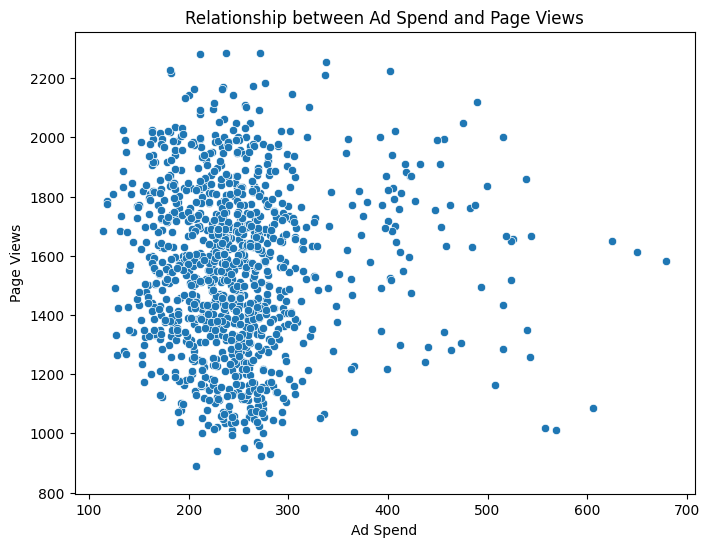

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ad_spend', y='page_views', data=df)
plt.title('Relationship between Ad Spend and Page Views')
plt.xlabel('Ad Spend')
plt.ylabel('Page Views')
plt.show()

In [ ]:
weekend_impact = df.groupby('is_weekend')[['page_views', 'ad_spend']].mean()
display(weekend_impact)

holiday_impact = df.groupby('is_holiday')[['page_views', 'ad_spend']].mean()
display(holiday_impact)

,page_views,ad_spend
is_weekend,,
False,1519.090793,268.655620
True,1636.388535,201.858422


,page_views,ad_spend
is_holiday,,
False,1552.064576,247.875711
True,1609.750000,397.914019


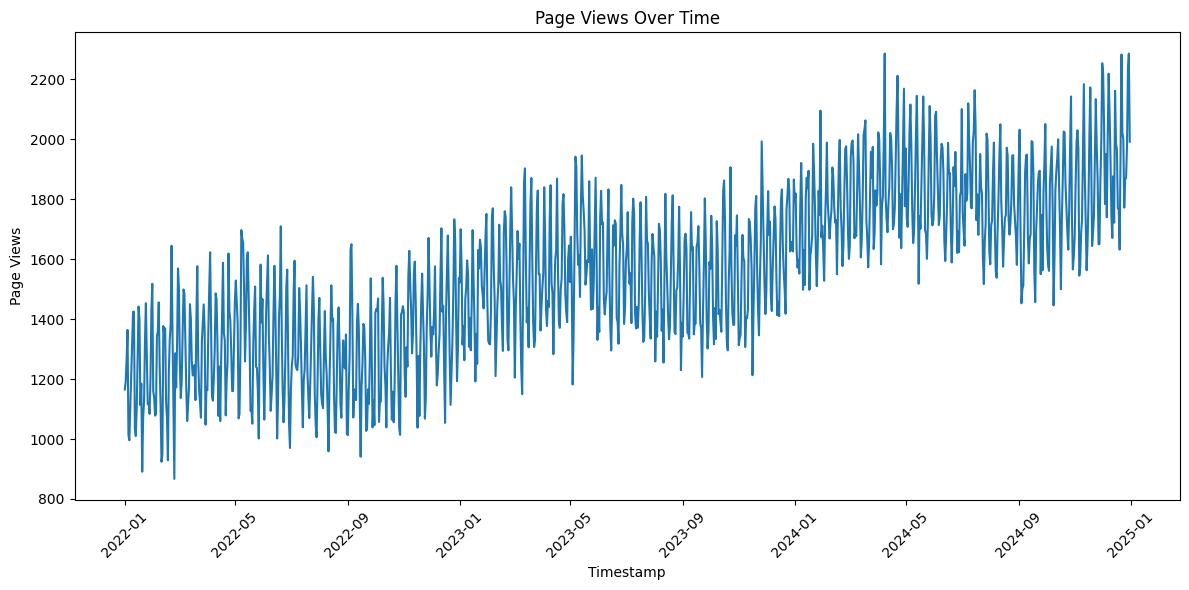

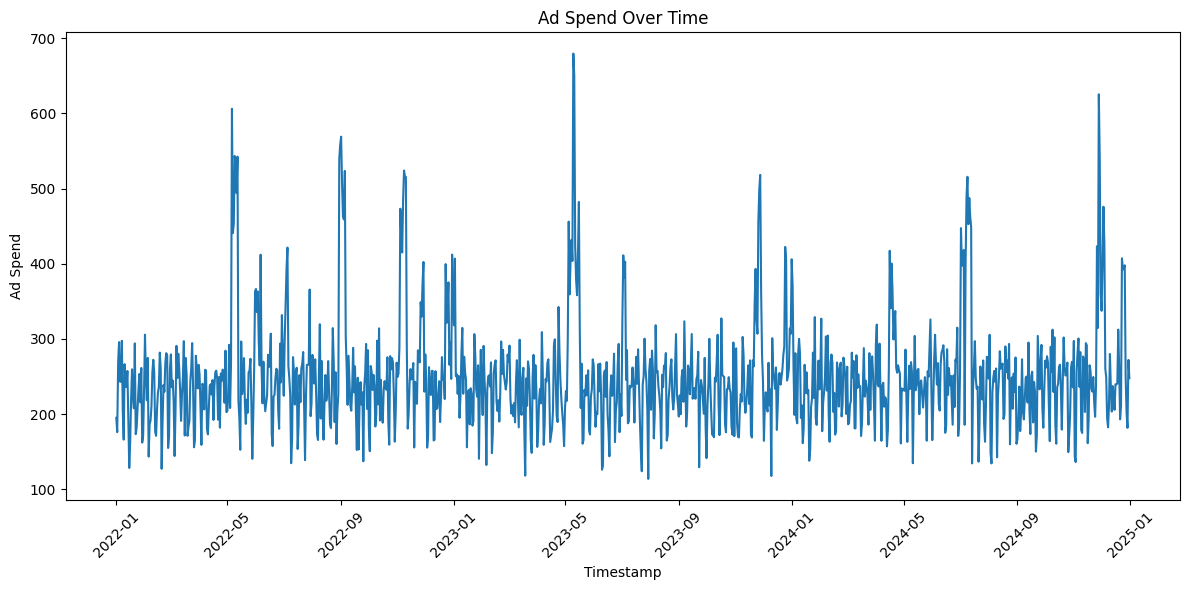

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['page_views'])
plt.title('Page Views Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Page Views')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ad_spend'])
plt.title('Ad Spend Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Ad Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here are the insights we identified based on the exploratory data analysis:

1.  **Relationship between Ad Spend and Page Views:** There appears to be a positive relationship, but it's not perfectly linear.
2.  **Impact of Weekends:** Higher page views and lower ad spend on weekends.
3.  **Impact of Holidays:** Higher page views and significantly higher ad spend on holidays.
4.  **Time Trends:** Fluctuations in both page views and ad spend over time, suggesting potential seasonal or yearly patterns.



## Exploratory Data Analysis Report

### Summary

This report summarizes the key findings from the exploratory data analysis performed on the personal e-commerce website ad cost and viewer count dataset. The analysis focused on understanding the distribution of page views and ad spend, the relationship between these two variables, and the impact of weekends and holidays on website traffic and ad expenditure. The key insights reveal a positive but not strictly linear relationship between ad spend and page views, higher organic traffic and lower ad spend on weekends, and significantly higher ad spend and page views on holidays. Time trends also indicate fluctuations in both metrics.

### Detailed Report

**1. Data Overview and Preparation:**

The dataset contains information on daily page views and ad spend for an e-commerce website, along with indicators for weekends and holidays. The data was loaded and the 'timestamp' column was converted to datetime objects and set as the index to facilitate time-series analysis. Additional features such as year, month, and day of the week were extracted for further analysis. The 'page_views' column was converted to integer type for consistency.

**2. Distribution Analysis:**

*   **Page Views:** The distribution of page views appears to be approximately normal, with a mean of around 1553 and a standard deviation of 277. The majority of daily page views fall within a range of roughly 1200 to 1800.
*   **Ad Spend:** The distribution of ad spend is skewed to the right, with a mean of around 249 and a standard deviation of 73. This indicates that while most days have ad spend concentrated around the average, there are some instances of significantly higher ad expenditure.

**3. Relationship between Ad Spend and Page Views:**

The scatter plot of ad spend versus page views shows a general positive correlation. As ad spend increases, there is a tendency for page views to increase as well. However, the relationship is not perfectly linear, suggesting that other factors besides ad spend influence the number of page views. There is some spread in the data points, indicating variability in the return on ad spend.

**4. Impact of Weekends and Holidays:**

*   **Weekends:** Grouping the data by the 'is_weekend' flag reveals that weekends have a higher average number of page views (approximately 1637) compared to weekdays (approximately 1520). Conversely, average ad spend is lower on weekends (approximately 202) than on weekdays (approximately 269). This suggests that organic traffic plays a significant role on weekends, and current advertising strategies might not be as focused on these days.
*   **Holidays:** Analyzing the impact of holidays shows that holidays have both higher average page views (approximately 1610) and significantly higher average ad spend (approximately 398) compared to non-holidays (approximately 1553 page views and 248 ad spend). This indicates that targeted ad campaigns are likely being run on holidays, effectively driving more traffic, but at a considerably higher cost.

**5. Time Trends:**

Time series plots of page views and ad spend over the entire period show fluctuations in both metrics. These fluctuations suggest the presence of potential seasonal patterns, yearly trends, or other temporal influences on website traffic and ad expenditure. Further analysis of these trends could provide insights for optimizing marketing strategies and budgeting throughout the year.

**Conclusion:**

The exploratory data analysis provides valuable insights into the website's performance, the impact of advertising, and the influence of external factors like weekends and holidays. These findings can be used to inform business intelligence decisions, such as optimizing ad spend allocation, understanding peak traffic periods, and evaluating the effectiveness of marketing campaigns. Further analysis, such as time series decomposition or regression modeling, could provide deeper insights and predictive capabilities.